In [6]:
import sys
sys.path.append('/Users/juanpablogomez/Documents/Desarrollo/market-anomaly-detector')

from src.preprocessing import add_technical_indicators
from src.anomaly_detection import detect_all_anomalies
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("../data/raw/all_tickers.csv", parse_dates=["Date"])
df = add_technical_indicators(df)
df = detect_all_anomalies(df)

# Filter ticker
ticker = 'AAPL'
df_plot = df[df['Ticker'] == ticker]


📊 **Visualizations**

🔺 RSI Anomalies

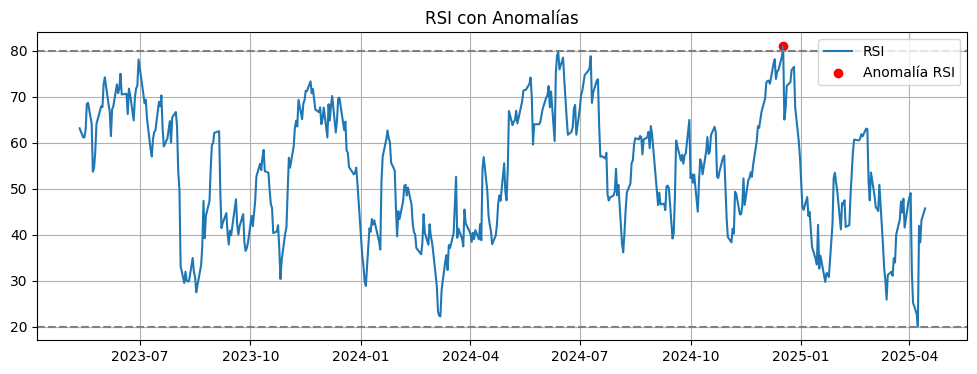

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(df_plot['Date'], df_plot['rsi'], label='RSI')
plt.scatter(df_plot['Date'][df_plot['rsi_anomaly']], df_plot['rsi'][df_plot['rsi_anomaly']], 
            color='red', label='Anomalía RSI')
plt.axhline(80, color='gray', linestyle='--')
plt.axhline(20, color='gray', linestyle='--')
plt.title('RSI con Anomalías')
plt.legend()
plt.grid()
plt.show()


📉 Bollinger Anomalies

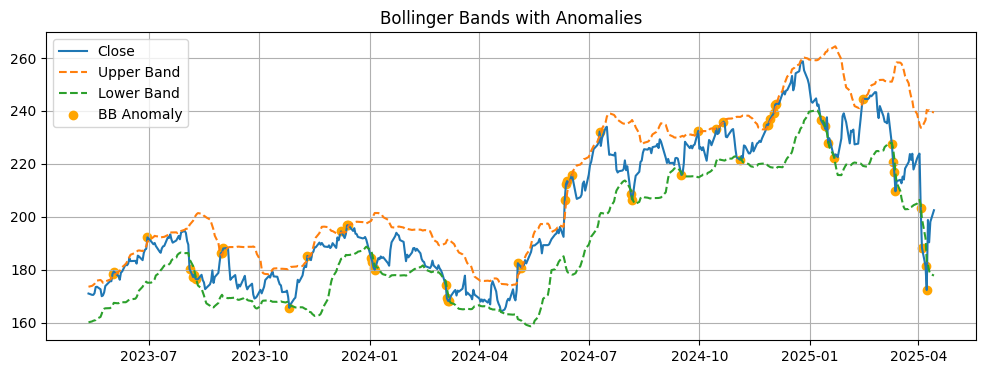

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(df_plot['Date'], df_plot['Close'], label='Close')
plt.plot(df_plot['Date'], df_plot['bb_h'], '--', label='Upper Band')
plt.plot(df_plot['Date'], df_plot['bb_l'], '--', label='Lower Band')
plt.scatter(df_plot['Date'][df_plot['bb_anomaly']], df_plot['Close'][df_plot['bb_anomaly']],
            color='orange', label='BB Anomaly')
plt.title('Bollinger Bands with Anomalies')
plt.legend()
plt.grid()
plt.show()


📈 Extreme logarithmics returns

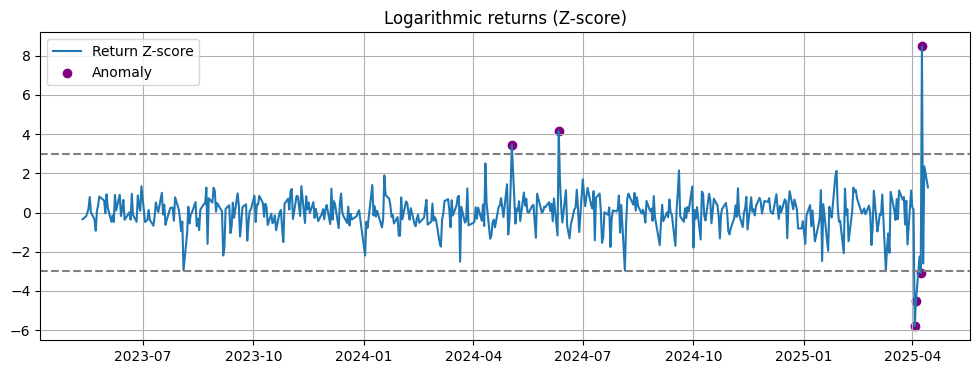

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(df_plot['Date'], df_plot['log_return_z'], label='Return Z-score')
plt.scatter(df_plot['Date'][df_plot['return_anomaly']], 
            df_plot['log_return_z'][df_plot['return_anomaly']], color='purple', label='Anomaly')
plt.axhline(3, color='gray', linestyle='--')
plt.axhline(-3, color='gray', linestyle='--')
plt.title('Logarithmic returns (Z-score)')
plt.legend()
plt.grid()
plt.show()


📊 Summary table per Ticker

In [11]:
# Summary per ticker
summary = df.groupby("Ticker")[['rsi_anomaly', 'bb_anomaly', 'return_anomaly']].sum().sort_values(by='return_anomaly', ascending=False)
summary['total_anomalies'] = summary.sum(axis=1)
summary = summary.sort_values(by='total_anomalies', ascending=False)
summary.head()


,rsi_anomaly,bb_anomaly,return_anomaly,total_anomalies
Ticker,,,,
BTC-USD,31,91,12,134
TSLA,22,70,7,99
JPM,14,59,10,83
SPY,2,67,5,74
AAPL,1,56,6,63


**Interactive Summary**

In [13]:
import plotly.graph_objects as go

def plot_anomalies_interactivo(df, ticker):
    df_ticker = df[df['Ticker'] == ticker]

    fig = go.Figure()

    # Price
    fig.add_trace(go.Scatter(x=df_ticker['Date'], y=df_ticker['Close'], mode='lines', name='Close'))

    # Bollinger Bands
    fig.add_trace(go.Scatter(x=df_ticker['Date'], y=df_ticker['bb_h'], mode='lines', name='BB High', line=dict(dash='dot')))
    fig.add_trace(go.Scatter(x=df_ticker['Date'], y=df_ticker['bb_l'], mode='lines', name='BB Low', line=dict(dash='dot')))

    # Anomalies
    df_anomaly = df_ticker[df_ticker['bb_anomaly'] | df_ticker['rsi_anomaly'] | df_ticker['return_anomaly']]
    fig.add_trace(go.Scatter(x=df_anomaly['Date'], y=df_anomaly['Close'], 
                             mode='markers', name='Anomalies', 
                             marker=dict(color='red', size=6)))

    fig.update_layout(title=f'Anomalies for {ticker}', xaxis_title='Date', yaxis_title='Price',
                      template='plotly_dark')
    fig.show()


In [14]:
plot_anomalies_interactivo(df, 'AAPL')